# 0. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# This option ensures the graphs I create is displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Define path
path = r'C:\Users\vicky\OneDrive\文件\careerfoundry\Data Analytics Immersion\Exercise 6\05-2024 Project'

In [5]:
# import dataset ( I setup a new files only incldue the column I need for this exercise)
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Telco Clustering data.csv'), index_col = False)

In [6]:
df.head()

,Age,Referrals,Tenure_Months,Add-on Service,Monthly Charge,Churn Score
0,78,0,1,3,39.65,91
1,74,1,8,5,80.65,69
2,71,0,18,7,95.45,81
3,78,1,25,7,98.50,88
4,80,1,37,4,76.50,67


# 1. The elbow technique

In [7]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [8]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\clust

[-15871426.253693737,
 -10610130.517281458,
 -8143554.574211753,
 -7016185.86547031,
 -6174878.582230417,
 -5607741.617401474,
 -5082800.675847643,
 -4703616.320589984,
 -4405214.859333159]

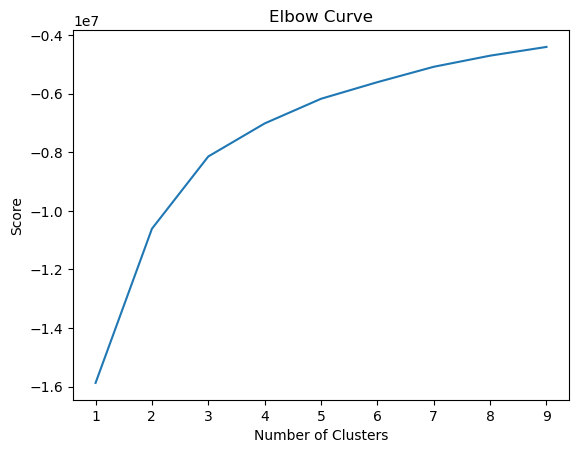

In [9]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow method suggests that the optimal number of clusters is the point where the curve starts to bend or flatten out. This means that the optimal count for my clusters is five.

# 2. k-means clustering

In [10]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 5) 

In [11]:
# Fit the k-means object to the data.
kmeans.fit(df)

C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [12]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
df.head()

,Age,Referrals,Tenure_Months,Add-on Service,Monthly Charge,Churn Score,clusters
0,78,0,1,3,39.65,91,3
1,74,1,8,5,80.65,69,4
2,71,0,18,7,95.45,81,4
3,78,1,25,7,98.50,88,4
4,80,1,37,4,76.50,67,4


In [14]:
df['clusters'].value_counts()

clusters
2    1798
4    1711
3    1464
0    1059
1    1011
Name: count, dtype: int64

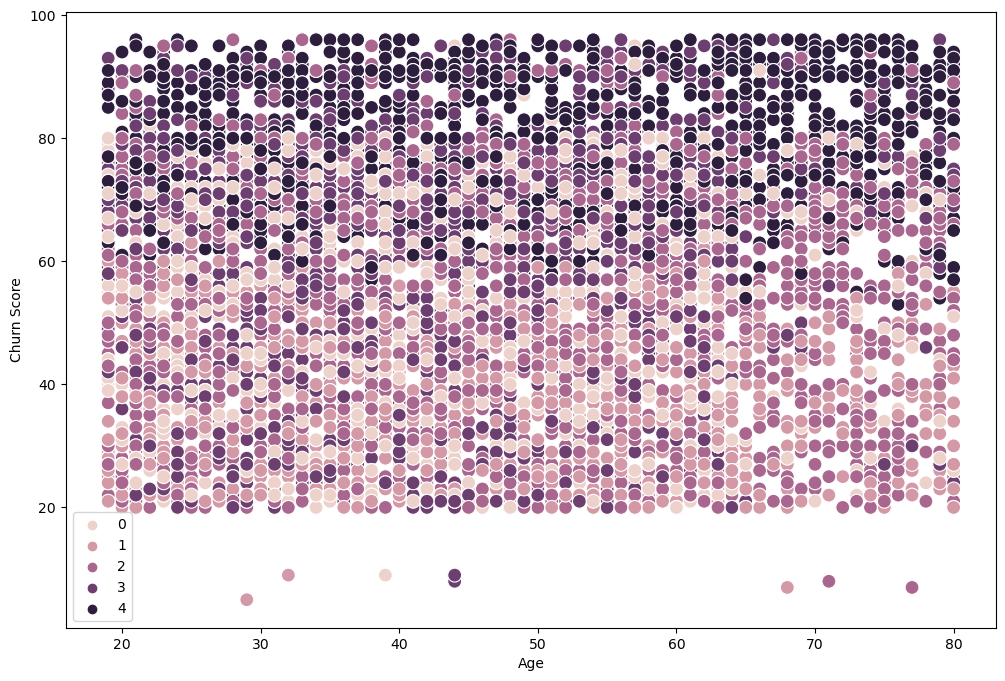

In [15]:
# Plot the clusters for the "Churn Score" and "Age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Age'], y=df['Churn Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Age') # Label x-axis.
plt.ylabel('Churn Score') # Label y-axis.
plt.show()

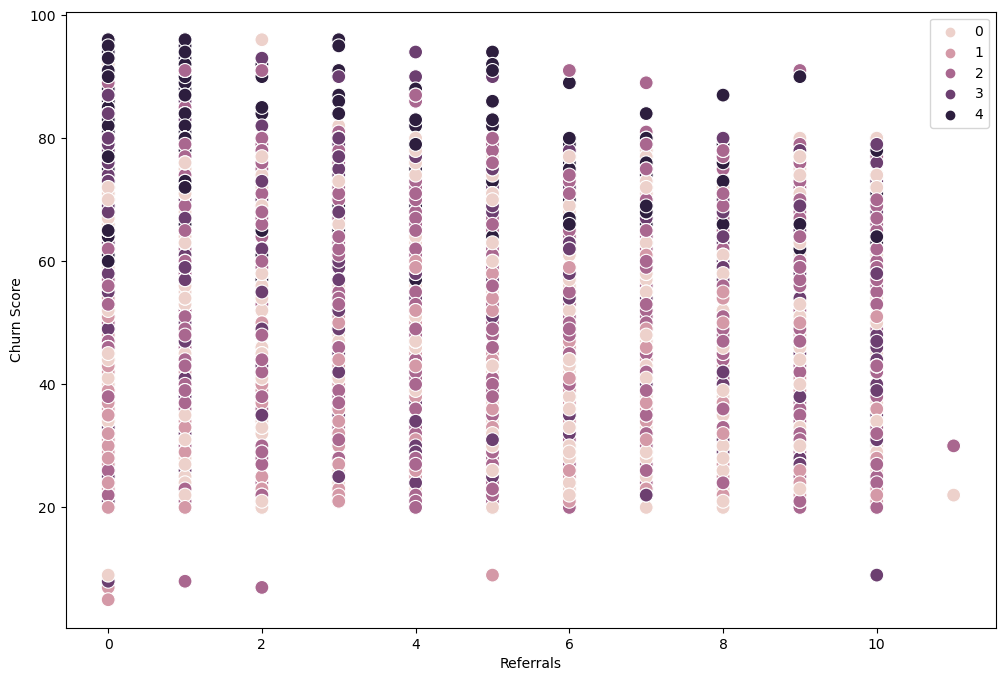

In [16]:
# Plot the clusters for the "Churn Score" and "Referrals" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Referrals'], y=df['Churn Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Referrals') # Label x-axis.
plt.ylabel('Churn Score') # Label y-axis.
plt.show()

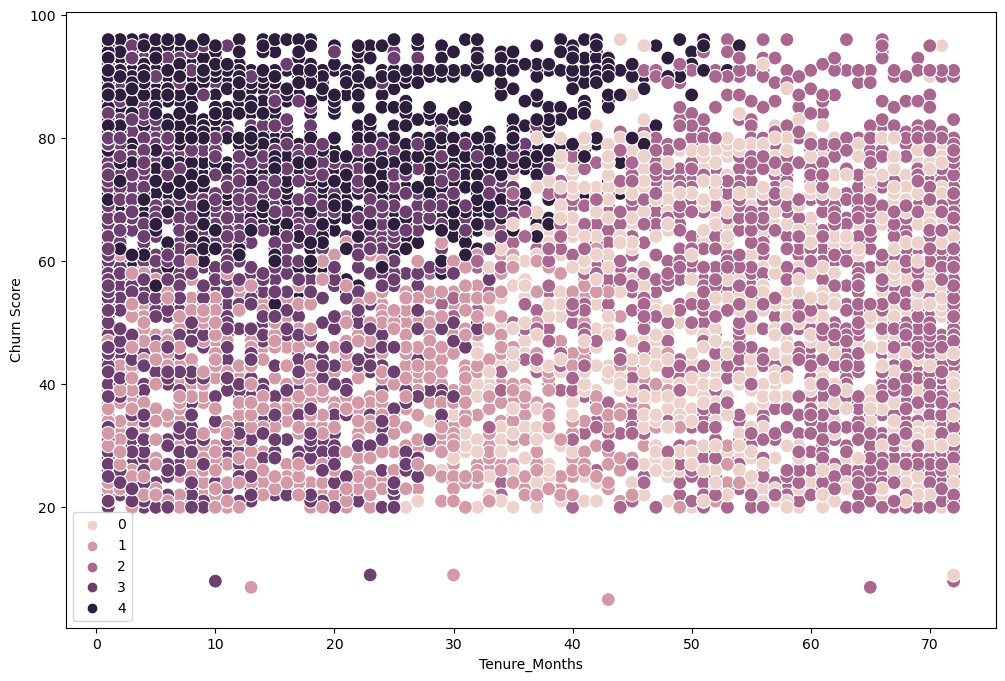

In [17]:
# Plot the clusters for the "Churn Score" and "Tenure_Months" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Tenure_Months'], y=df['Churn Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Tenure_Months') # Label x-axis.
plt.ylabel('Churn Score') # Label y-axis.
plt.show()

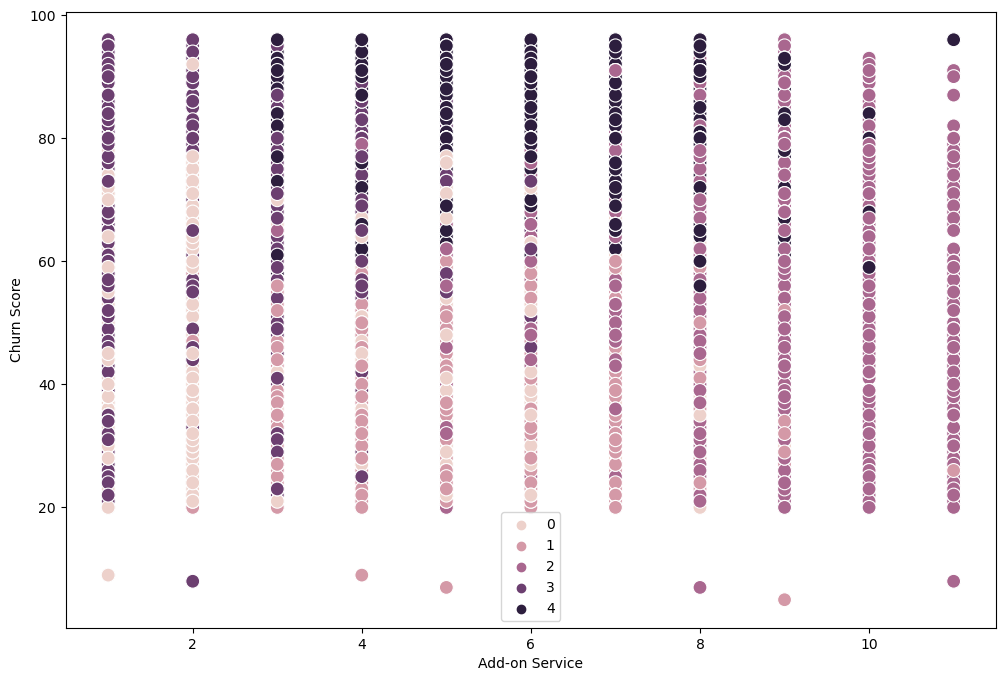

In [18]:
# Plot the clusters for the "Churn Score" and "Add-on Service" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Add-on Service'], y=df['Churn Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Add-on Service') # Label x-axis.
plt.ylabel('Churn Score') # Label y-axis.
plt.show()

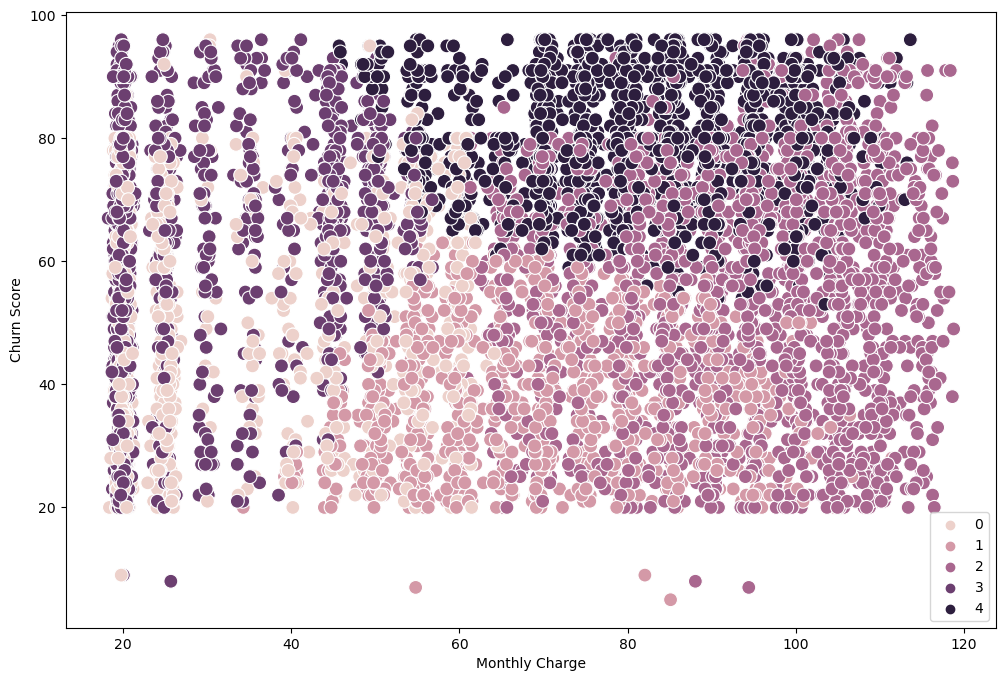

In [19]:
# Plot the clusters for the "Churn Score" and "Monthly Charge" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Monthly Charge'], y=df['Churn Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Monthly Charge') # Label x-axis.
plt.ylabel('Churn Score') # Label y-axis.
plt.show()

In [20]:
df.loc[df['clusters'] == 0, 'cluster'] = 'beige'
df.loc[df['clusters'] == 1, 'cluster'] = 'light purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 4, 'cluster'] = 'black'

In [25]:
df.groupby('cluster').agg({'Age':['mean', 'median'], 
                         'Referrals':['mean', 'median'], 
                         'Tenure_Months':['max','min','mean', 'median'],
                         'Add-on Service':['max','min','mean', 'median'],
                          'Monthly Charge':['max','min','mean', 'median'],
                         'Churn Score':['max','min','mean', 'median'] })

Age        Referrals        Tenure_Months                 \
                   mean median      mean median           max min       mean   
cluster                                                                        
beige         44.092540   44.0  2.924457    1.0            72  26  55.226629   
black         50.129749   51.0  0.839275    0.0            54   1  15.211572   
dark purple   42.390710   42.0  1.288934    0.0            38   1  10.536885   
light purple  46.443126   47.0  1.827893    0.0            56   1  19.808111   
purple        47.879867   47.0  3.047275    1.0            72  27  60.142380   

                    Add-on Service                      Monthly Charge         \
             median            max min      mean median            max    min   
cluster                                                                         
beige          56.0              9   1  2.885741    2.0          64.75  18.40   
black          12.0             11   2  5.670368    6.0         113.60  44.70   
dark purple     8.0              7   1  2.086749    1.0          56.80  18.25   
light purple   19.0             11   2  5.655786    6.0         111.40  34.30   
purple         62.5             11   2  8.289210    8.0         118.75  60.40   

                               Churn Score                        
                   mean median         max min       mean median  
cluster                                                           
beige         32.284844  24.95          96   9  50.644948   51.0  
black         81.686704  80.95          96  53  79.043250   79.0  
dark purple   28.767350  20.85          96   8  59.495902   63.0  
light purple  70.952770  70.30          63   5  37.680514   37.0  
purple        93.610873  95.10          96   7  54.492770   55.0

## The descriptive statistics and scatterplots above provide some useful insights:

1. Black clusters are high-risk Churn customers. In this group, the chrun score ranges from 53 to 96, with an average of 79. Compared to other groups, this group has an older average age(50 years old) and less referals. This group of customers has at least two add-on services and an average of five add-on services. Additionally, this group has an average tenure of 12 months with the company.

2. The dark purple clusters represent customers at medium-high risk of churning out. According to the scatterplot, this group has fewer months in tenure and fewer monthly changes & add-on services. The customers might not have much loyalty to the brand and may make decisions based on a lower price or other promotion from a competitor.

3. The purple clusters may be our values customers with the longest average tenure months, the most referrals, and the highest monthly fees.

4. The light purple clusters are low-risk Churn customers with a liitle newer relationship with the company the (2 year average tenure period),  higher add-on sercive and monthly fees.

5.Those in beige clusters could be our basic plan customers who have a low monthly charge on average and have a average tenure period of over 4 years.